In [24]:
import torch 
import torch.nn.functional as F


In [ ]:
import torch 
import torch.nn.functional as F


In [ ]:
import torch 
import torch.nn.functional as F


In [ ]:
import torch 
import torch.nn.functional as F


In [25]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])


In [26]:
# 定义一个Logistic回归模型类，继承自PyTorch中的nn.Module类
class LogisticRegressionModel(torch.nn.Module):
    # 初始化函数
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()  # 调用父类的初始化函数
        # 定义线性层，1个输入特征（x）和1个输出特征（y）
        self.linear = torch.nn.Linear(1, 1)

    # 前向传播函数
    def forward(self, x):
        # 使用sigmoid激活函数进行预测
        y_pred = F.sigmoid(self.linear(x))
        return y_pred


# 创建一个Logistic回归模型实例
model = LogisticRegressionModel()


In [27]:
# 定义二元交叉熵损失函数，size_average参数表示输出是否被平均
criterion = torch.nn.BCELoss(size_average=False)

# 定义随机梯度下降优化器，使用model.parameters()获取需要更新的参数，学习率为0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [28]:
# 设置训练循环，将数据集中的所有样本迭代1000次(epoch)
for epoch in range(1000):
    # 运行模型(model)以获取对当前输入(x_data)的预测(y_pred)
    y_pred = model(x_data)
    # 计算损失(loss)，这是神经网络误差的度量，损失越小代表模型拟合得越好
    loss = criterion(y_pred, y_data)
    
    # 打印当前epoch和对应的损失值
    print(epoch, loss.item())

    # 重置优化器的梯度为零，以防止它们在计算下一个batch的梯度时被累积
    optimizer.zero_grad()
    # 在当前batch上计算梯度，并反向传播到模型的每个参数上
    loss.backward()
    # 更新模型参数，以使其更好地拟合训练数据。此处使用优化器(optimizer)来更新权重/偏置
    optimizer.step()


/opt/homebrew/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 3.3505935668945312
1 3.281599760055542
2 3.2151055335998535
3 3.151128053665161
4 3.0896787643432617
5 3.0307583808898926
6 2.9743576049804688
7 2.9204623699188232
8 2.869046688079834
9 2.8200783729553223
10 2.773515224456787
11 2.7293097972869873
12 2.687405824661255
13 2.6477417945861816
14 2.610250473022461
15 2.574860095977783
16 2.5414938926696777
17 2.5100741386413574
18 2.480517625808716
19 2.4527413845062256
20 2.4266622066497803
21 2.402195453643799
22 2.3792564868927
23 2.3577637672424316
24 2.3376352787017822
25 2.318790912628174
26 2.301154613494873
27 2.284651041030884
28 2.2692089080810547
29 2.254758358001709
30 2.24123477935791
31 2.2285749912261963
32 2.21671986579895
33 2.205613136291504
34 2.1952016353607178
35 2.1854355335235596
36 2.1762683391571045
37 2.1676554679870605
38 2.1595566272735596
39 2.151933193206787
40 2.1447486877441406
41 2.1379709243774414
42 2.131568431854248
43 2.1255123615264893
44 2.1197762489318848
45 2.114335298538208
46 2.1091666221618652


In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# 创建一个包含200个等距样本的数组
x = np.linspace(0, 10, 200)

# 将NumPy数组转换为PyTorch张量，并调整其形状为200行1列
x_t = torch.Tensor(x).view((200, 1))

# 使用名为“model”的预训练模型对输入进行前向传递，得到输出值
y_t = model(x_t)

# 将PyTorch张量转换为NumPy数组
y = y_t.data.numpy()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


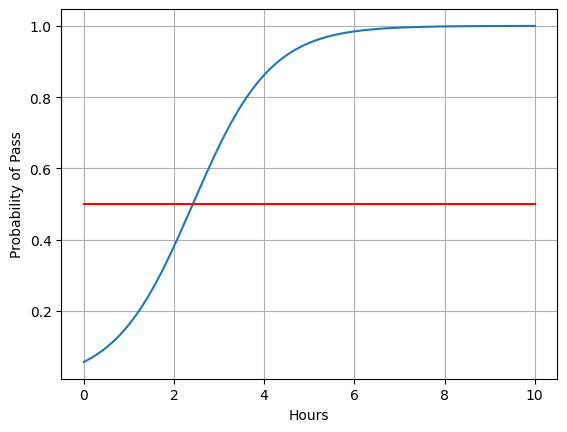

In [31]:
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()
